In [3]:
import plotly.graph_objects as go
import pandas as pd

In [11]:
Candles = 500

In [13]:
pp = pd.read_csv('/work/base_data_history.csv')
pp = pp.iloc[-Candles:]
pp['datetime'].max()
print("{0} Maximum data available".format(pp['datetime'].max()))

2025-04-02 22:50:00+00:00 Maximum data available


In [19]:
# Create the figure with dark theme
fig = go.Figure(data=go.Candlestick(x=pp['datetime'], 
                             open=pp['Open'], 
                             high=pp['High'], 
                             low=pp['Low'], 
                             close=pp['Close'])) 

# Add bullish and bearish points
bullish_points = pp[(pp['bullish_flag'] > 0) & (pp['y_true'] ==2)]
bullish_points_actual = pp[(pp['bullish_flag'] > 0) & (pp['y_true'] ==1)]
bullish_points_nuetral = pp[(pp['bullish_flag'] > 0) & (pp['y_true'] !=1)]

# Add scatter traces for different signals
fig.add_trace(go.Scatter(
    x=bullish_points_nuetral['datetime'],
    y=bullish_points_nuetral['High'] * 1.0005,
    mode='markers',
    name='Bullish Flag',
    marker=dict(
        color='red',
        symbol='triangle-up',
        size=15,
        opacity=0.8
    )
))

fig.add_trace(go.Scatter(
    x=bullish_points_actual['datetime'],
    y=bullish_points_actual['High'] * 1.0005,
    mode='markers',
    name='Bullish Flag Actual',
    marker=dict(
        color='green',
        symbol='triangle-up',
        size=15,
        opacity=0.8
    )
))


# Update layout with dark theme and expanded chart area
fig.update_layout(
    title='OHLC Chart with Bullish Signals',
    yaxis_title='Price',
    xaxis_title='Date Time',
    showlegend=False,
    template='plotly_dark',
    width=1800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='rgba(0,0,0,1)',
    plot_bgcolor='rgba(0,0,0,1)',
)

# Show the plot
fig.show()

In [17]:
fig = go.Figure(data=go.Candlestick(x=pp['datetime'], 
                             open=pp['Open'], 
                             high=pp['High'], 
                             low=pp['Low'], 
                             close=pp['Close'])) 

# Add bullish and bearish points

bearish_points_actual = pp[(pp['bearish_flag'] ==2) & (pp['y_true'] ==2)]
bearish_points_nuetral = pp[(pp['bearish_flag'] ==2) & (pp['y_true'] !=2)]
#bearish_points = pp[(pp['bearish_flag'] ==2) ]

# Add scatter traces for different signals
fig.add_trace(go.Scatter(
    x=bearish_points_nuetral['datetime'],
    y=bearish_points_nuetral['High'] * 1.0005,
    mode='markers',
    name='Bearish Flag',
    marker=dict(
        color='red',
        symbol='triangle-down',
        size=15,
        opacity=0.8
    )
))

fig.add_trace(go.Scatter(
    x=bearish_points_actual['datetime'],
    y=bearish_points_actual['Low'] * 1.0005,
    mode='markers',
    name='Bearish Flag Actual',  # Fixed the name to differentiate
    marker=dict(
        color='green',
        symbol='triangle-down',
        size=15,
        opacity=0.8
    )
))


# Update layout with dark theme and expanded chart area
fig.update_layout(
    title='OHLC Chart with Bullish Signals',
    yaxis_title='Price',
    xaxis_title='Date Time',
    showlegend=False,
    template='plotly_dark',
    width=1800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='rgba(0,0,0,1)',
    plot_bgcolor='rgba(0,0,0,1)',
)

# Show the plot
fig.show()


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       288
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.98       288
   macro avg       0.33      0.33      0.33       288
weighted avg       1.00      0.98      0.99       288

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Recall and 

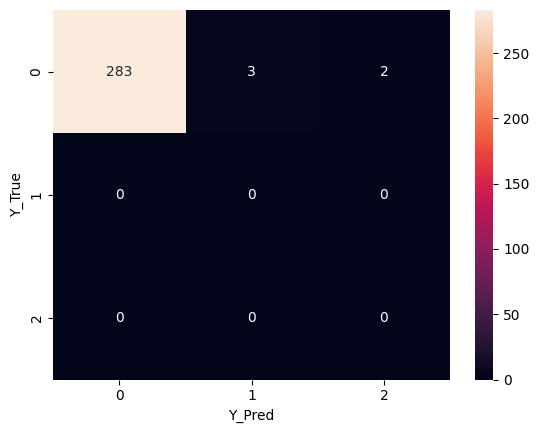

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

pp['y_pred'] = pp['bearish_flag'] + pp['bullish_flag']
predicted_classes = pp['y_pred']
true_classes = pp['y_true'] 

# Generate Confusion Matrix and Classification Report
class_report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
f = sns.heatmap(cm, annot=True, fmt='d')
f.set(xlabel='Y_Pred', ylabel='Y_True')
print(classification_report(true_classes, predicted_classes, digits=2))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a127aa9e-0a77-4af9-a6ce-85e7a9b74042' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>